# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from scipy import stats

# 2. Collect and load data

In [143]:
df=pd.read_csv('bigcity.csv')
df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [144]:
df1=df.set_index('Unnamed: 0')
df1.head()

,u,x
Unnamed: 0,,
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75


# 3. Explore numeric variables - five number summary

In [145]:
df1.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

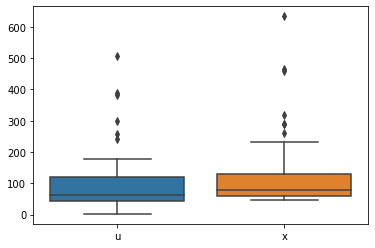

In [146]:
sns.boxplot(data=df1)
plt.show()

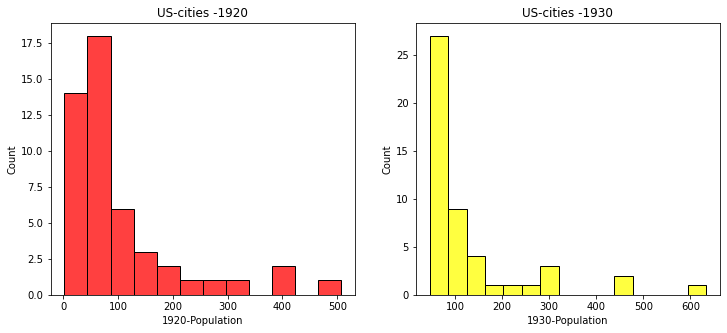

In [147]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['u'],color='red')
plt.xlabel('1920-Population')
plt.title('US-cities -1920')
plt.subplot(1,2,2)
sns.histplot(df['x'],color='yellow')
plt.xlabel('1930-Population')
plt.title('US-cities -1930')
plt.show()

In [148]:
df1.var()

u    10900.416667
x    15158.832483
dtype: float64

In [149]:
df1.std()

u    104.405061
x    123.121211
dtype: float64

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

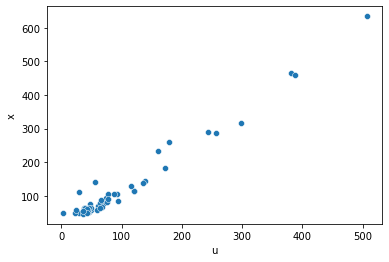

In [150]:
sns.scatterplot(data=df1,x='u',y='x')
plt.show()

In [151]:
pd.crosstab(df['u'],df['x'])

x,46,48,50,52,53,54,57,58,60,61,...,143,183,232,260,288,291,317,459,464,634
u,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [152]:
print('data_shape',df1.shape)
x=df1['u']
y=df1['x']

data_shape (49, 2)


# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [153]:
df1.isnull().sum()

u    0
x    0
dtype: int64

In [154]:
df1.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(39,)
(39,)
(10,)
(10,)


In [156]:
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

C:\Users\annis\AppData\Local\Temp/ipykernel_12120/1150265412.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_train = x_train[:, np.newaxis]
C:\Users\annis\AppData\Local\Temp/ipykernel_12120/1150265412.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_test = x_test[:, np.newaxis]


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [157]:
lr=LinearRegression()
lr_model=lr.fit(x_train,y_train)

In [166]:
##coefficient
print('Coefficient b1',lr_model.coef_)
coef=lr_model.coef_

Coefficient b1 [1.16155798]


In [162]:
print('Intercept b0',lr_model.intercept_)
intercept=lr_model.intercept_

Intercept b0 5.662522617269246


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

In [161]:
y_pred=lr.predict(x_test)
y_pred

array([ 59.09418954,  63.74042144, 140.40324789,  70.7097693 ,
        55.60951561,  96.26404478, 213.58140041, 114.84897241,
        32.37835608,  39.34770394])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


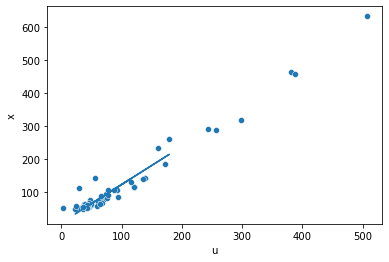

In [184]:
sns.scatterplot(df['u'],df['x'])
plt.plot(x_test,y_pred)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [186]:
mse=mean_squared_error(y_test,y_pred)
print('Mean_square_error',mse)
rmse=np.sqrt(mse)
print('Root_mean_square',rmse)

Mean_square_error 875.4880739666635
Root_mean_square 29.588647721155887


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [187]:
y_train_pred= lr.predict(x_train)
y_test_pred= lr.predict(x_test)

In [189]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

In [190]:
print('R2 train',r2_train)
print('R2 test',r2_test)

R2 train 0.9737243775595023
R2 test 0.7740675938150546
